# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Este notebook tem como finalidade compilar diversas análises à respeito de uma base de clientes de uma instituição financeira. Praticaremos exercícios de modelagem, previsão e tentaremos explorar os dados de maneira que seja possível tirar conclusões sobre a relação entre a renda e as diferentes variáveis que a influenciam.

Além disso, também elaboraremos materiais entregáveis com qualidade, para que os contratantes do projeto consigam visualizar os resultados da melhor maneira possível.

## Etapa 2 Crisp-DM: Entendimento dos dados

Para realizar as análises, é fundamental entender quais dados estão disponíveis na base de dados. Por isso, foi elaborado um dicionário de dados com as variáveis encontradas e suas respectivas descrições e tipos.


### Dicionário de dados


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência do registro                     |    object    |
| id_cliente              |  Código único para cada cliente                     |    int 64    |
| sexo                    |  Sexo do cliente                                    |    object    |
| posse_de_veiculo        |  (1) se o cliente possui veículo, (0) se não        |     bool     |
| posse_de_imovel         |  (1) se o cliente possui imóvel, (0) se não         |     bool     |
| qtd_filhos              |  Quantidade de filhos que o cliente possui          |    int 64    |
| tipo_renda              |  Tipo da renda obtida pelo cliente                  |    object    |
| educacao                |  Nível de escolaridade do cliente                   |    object    |
| estado_civil            |  Estado civil do cliente                            |    object    |
| tipo_residencia         |  Tipo da residência do cliente                      |    object    |
| idade                   |  Idade do cliente                                   |    int 64    |
| tempo_emprego           |  Há quanto tempo o cliente está empregado           |   float 64   |
| qt_pessoas_residencia   |  Qts. pessoas vivem na mesma residência do cliente  |   float 64   |
| renda                   |  Renda do cliente                                   |   float 64   |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

Neste primeiro momento, importaremos os seguintes pacotes:

`Pandas`, para manipulação de dataframes;

`Seaborn` e `Matplotlib` para análise e visualização de resultados;

`Ydata_profiling` para visualizar um resumo estatístico com as principais características da nossa base de dados.


In [47]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas. Após ler o dataframe, vamos visualizar uma parte dele e garantir que as datas presentes na coluna 'data_ref' estão de fato no formato de data. Por fim, vamos dropar a coluna `Unnamed:0`, pois ela é somente uma duplicata do índice.

In [48]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [49]:
renda.head(5)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [50]:
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

renda.drop(columns=['Unnamed: 0'], inplace=True)

#### Entendimento dos dados - Univariada
Nesta etapa avaliaremos a distribuição de todas as variáveis. Com o comando `ProfileReport`, conseguimos um grande resumo estatístico de todas as variáveis presentes na base de dados.

In [51]:
prof = ProfileReport(renda, explorative=True, minimal=True)

#prof.to_file('./output/renda_analisys.html')

prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Com o resumo acima, é possível ver alguns números preliminares de cada coluna que compõe o dataframe do estudo, como número de valores distintos, quantidade de células vazias e, em alguns casos, é possível visualizar histogramas para ver a distribuição dos dados com relação a uma variável específica.

Aqui já percebemos que a coluna `tempo_emprego` está com muitos dados faltantes, e isso precisará ser tratado adiante.


### Entendimento dos dados - Bivariadas




Para o entendimento de dados utilizando de análises bivariadas, podemos separar algumas variáveis para tentar visualizar alguma correlação entre elas. Para visualizar a força dessas correlações, criaremos dummies e utilizaremos a função `.corr` abaixo.


In [52]:
renda_dummies = pd.get_dummies(renda)

renda_dummies.corr()

,data_ref,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
data_ref,1.000000,0.015528,-0.003375,0.000308,-0.002572,-0.001247,0.004817,-0.003520,0.005628,0.000807,...,-0.007664,0.004288,0.013695,0.004978,0.004202,-0.003206,0.001210,-0.006109,0.003318,0.002218
id_cliente,0.015528,1.000000,-0.012072,-0.102863,0.030296,-0.057812,-0.036373,0.037951,-0.009129,-0.023770,...,-0.028308,0.007079,-0.013365,-0.036087,-0.015137,-0.031335,0.023409,0.015588,0.013864,0.024122
posse_de_veiculo,-0.003375,-0.012072,1.000000,-0.014172,0.118690,-0.178903,-0.076155,0.167240,0.100493,-0.358470,...,-0.082840,-0.073796,-0.047689,-0.098232,0.011139,-0.027822,0.026563,0.025151,0.034215,-0.015651
posse_de_imovel,0.000308,-0.102863,-0.014172,1.000000,-0.022738,0.140510,0.009465,-0.023415,0.003880,0.059459,...,-0.033593,0.007541,-0.025896,0.047083,-0.026711,0.191634,-0.152185,-0.015906,-0.021366,-0.115544
qtd_filhos,-0.002572,0.030296,0.118690,-0.022738,1.000000,-0.360426,-0.063220,0.889777,0.029346,-0.122694,...,-0.015975,-0.118029,-0.002094,-0.105217,-0.007012,-0.015126,0.044441,-0.003657,0.015789,-0.028422
idade,-0.001247,-0.057812,-0.178903,0.140510,-0.360426,1.000000,0.321573,-0.339320,0.022435,0.227529,...,0.052560,-0.067959,-0.058235,0.235861,-0.069153,0.138592,-0.184278,-0.015104,-0.002012,0.034912
tempo_emprego,0.004817,-0.036373,-0.076155,0.009465,-0.063220,0.321573,1.000000,-0.065670,0.385013,0.132896,...,0.027112,0.001953,-0.013919,0.031188,-0.044785,0.062624,-0.069504,-0.026384,0.016734,0.013136
qt_pessoas_residencia,-0.003520,0.037951,0.167240,-0.023415,0.889777,-0.339320,-0.065670,1.000000,0.047842,-0.166033,...,-0.225392,-0.408152,0.066820,-0.276143,-0.017538,-0.004687,0.031347,-0.003608,0.018640,-0.024987
renda,0.005628,-0.009129,0.100493,0.003880,0.029346,0.022435,0.385013,0.047842,1.000000,-0.285076,...,-0.011315,-0.024545,-0.027234,-0.051015,0.003480,0.002860,-0.017231,-0.009513,0.028400,0.004927
sexo_F,0.000807,-0.023770,-0.358470,0.059459,-0.122694,0.227529,0.132896,-0.166033,-0.285076,1.000000,...,0.069079,0.037267,0.020264,0.150237,-0.064066,0.063362,-0.060646,-0.002564,-0.047939,0.027534


Nessa grande tabela, no entanto, nos interessa mais as correlações específicas envolvendo a variável renda. Por isso criaremos um filtro para visualizá-las melhor.

In [53]:
correlacao = renda_dummies.corr()

correlacoes_fortes_pares = correlacao.unstack().reset_index()
correlacoes_fortes_pares.columns = ['Variável 1', 'Variável 2', 'Correlação']

# Filtra as correlações (acima de 0.1 e diferentes de 1)
correlacoes_fortes_pares = correlacoes_fortes_pares[
    (correlacoes_fortes_pares['Correlação'] > 0.1) & 
    (correlacoes_fortes_pares['Variável 1'] != correlacoes_fortes_pares['Variável 2'])
]

correlacoes_fortes_pares = correlacoes_fortes_pares.sort_values(by='Correlação',ascending=False).reset_index(drop=True)

# Filtra somente as correlações que envolvam a variável 'renda'
correlacoes_fortes_pares = correlacoes_fortes_pares[correlacoes_fortes_pares['Variável 1']=='renda']

print(correlacoes_fortes_pares)

   Variável 1        Variável 2  Correlação
6       renda     tempo_emprego    0.385013
13      renda            sexo_M    0.285076
63      renda  posse_de_veiculo    0.100493


Essas são algumas das correlações que vamos explorar visualmente através de gráficos e realizar análises. Aqui vão alguns exemplos:

C:\Users\BrunodaCunhaPeixoto\AppData\Local\Temp\ipykernel_14896\297515577.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='posse_de_veiculo',y='renda',data=renda, palette = 'Set1')
C:\Users\BrunodaCunhaPeixoto\AppData\Local\Temp\ipykernel_14896\297515577.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sexo',y='renda',data=renda, palette = 'Set1')


<Axes: xlabel='tempo_emprego', ylabel='renda'>

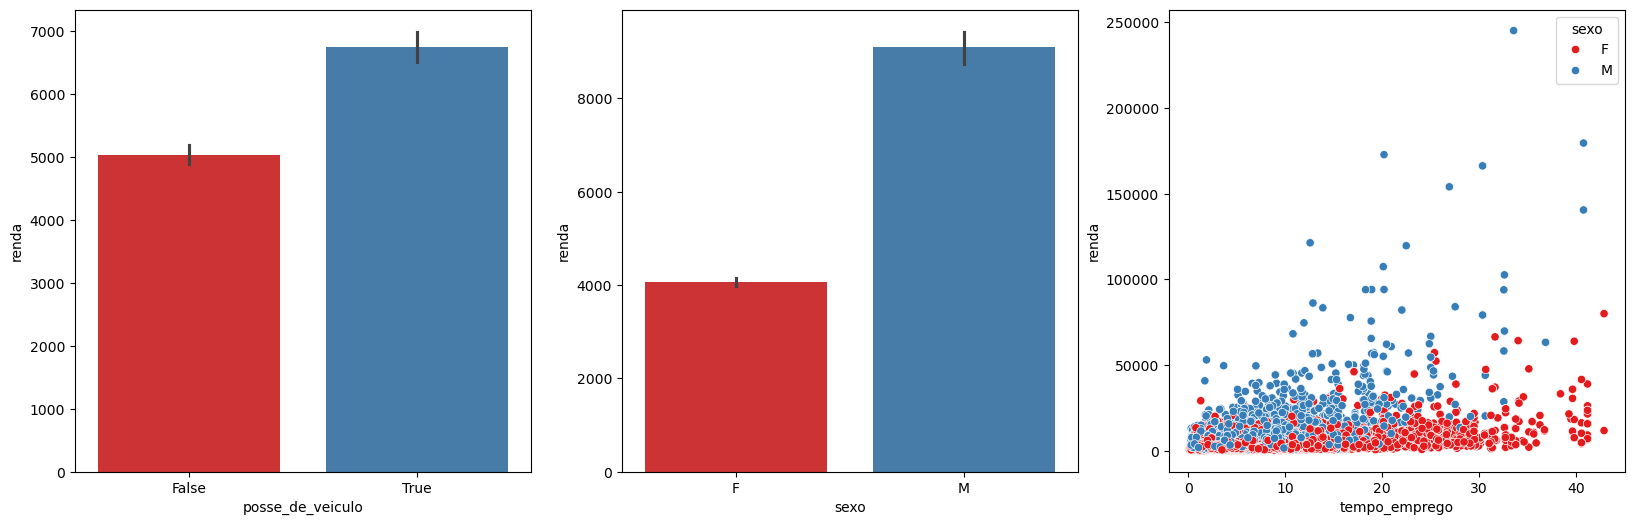

In [54]:
#fig, ax = plt.subplots(3,1,figsize=(8,10))
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.barplot(x='posse_de_veiculo',y='renda',data=renda, palette = 'Set1')

plt.subplot(132)
sns.barplot(x='sexo',y='renda',data=renda, palette = 'Set1')

plt.subplot(133)
sns.scatterplot(x='tempo_emprego',y='renda',data=renda, hue='sexo', palette = 'Set1')

Nos 3 exemplos acima é possível perceber as relações entre a variável `renda` e as variáveis `posse_de_veiculo` , `sexo` e `tempo_emprego`. Enquanto claramente já é possível ver uma relação onde pessoas com posse de veículo ou pessoas do sexo masculino tendem a possuir uma renda maior do que as pessoas que não possuem ou são mulheres, a relação com a variável `tempo_emprego` não é tão facilmente percebida, o que pode ser uma oportunidade para analisá-la através de alguma transformação e/ou utilizando modelagens nos passos seguintes.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



Com relação a etapa de preparação dos dados, já realizamos algumas mudanças no início do estudo, como a remoção da coluna 'Unnamed 0' e a formatação da coluna de data. Ainda assim, precisamos identificar e tratar dados faltantes, e também podemos ver sobre a construção de novas variáveis que possam contribuir para a análise do modelo.

In [55]:
missing_values = renda.isnull().sum()
print(missing_values)

renda.shape

data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64


(15000, 14)

Como já indicado anteriormente, a coluna 'tempo_emprego' possui 2573 registros com valores em branco, que podem atrapalhar algumas das análises, enquanto as demais colunas estão completas. Para esse estudo, vamos remover todas as linhas que estão com dados faltantes para trabalharmos somente com dados completos.

In [56]:
renda = renda.dropna(subset=['tempo_emprego'])

renda.shape

(12427, 14)

Com a exclusão dos registros, a base diminuiu em aproximadamente 17%, mas agora conseguimos garantir que todos os registros estão completos e poderão ser trabalhados em todas as nossas análises.

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Como o objetivo é prever a renda (variável contínua), um modelo de regressão seria adequado. Algumas técnicas possíveis incluem:

- Regressão Linear: Simples de implementar e interpretar.
- Árvore de Decisão (Decision Tree Regression): Modelo que lida bem com dados categóricos e não-linearidades.
- Random Forest ou Gradient Boosting: Métodos mais complexos baseados em árvores de decisão, com melhor capacidade preditiva.
- Regressão Ridge ou Lasso: Podem ser úteis para lidar com multicolinearidade.

Para este notebook, iremos explorar tanto a Regressão Linear quanto a Árvore de Decisão, e comparar ambos os resultados.

### Rodando o modelo


Primeiro, vamos começar modelando os dados, separando-os em um set de treinamento e outro de testes.


In [57]:
from sklearn.model_selection import train_test_split

renda_dummies = pd.get_dummies(renda)

X = renda_dummies.drop(['renda', 'data_ref'],axis=1)  # Variáveis independentes
y = renda_dummies['renda']  # Variável dependente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Agora, vamos testar a regressão linear e olhar tanto para o MSE - Mean Squared Error, quanto para a pontuação do $R^2$

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Treinamento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Previsões
y_pred = modelo.predict(X_test)

# Avaliação

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regressão Linear:")
print(f'MSE: {mse}')
print(f'R²: {r2}')

Regressão Linear:
MSE: 40737308.83096991
R²: 0.29570741560005886


Agora vamos verificar os mesmos valores, mas utilizando a árvore de regressão.

In [59]:
from sklearn.tree import DecisionTreeRegressor

# Instanciar o modelo
modelo_arvore = DecisionTreeRegressor(random_state=42)

# Treinar o modelo de árvore de decisão
modelo_arvore.fit(X_train, y_train)

# Fazer previsões
y_pred_arvore = modelo_arvore.predict(X_test)

# Avaliar o modelo
mse_arvore = mean_squared_error(y_test, y_pred_arvore)
r2_arvore = r2_score(y_test, y_pred_arvore)

# Exibir os resultados
print("Árvore de Regressão:")
print(f"MSE: {mse_arvore}")
print(f"R²: {r2_arvore}")


Árvore de Regressão:
MSE: 41004263.016929485
R²: 0.29109214132344985


Utilizando o statsmodels

In [60]:
import numpy as np
import statsmodels.formula.api as smf

modelo_renda = smf.ols('renda ~ tempo_emprego + idade + qt_pessoas_residencia + posse_de_veiculo + posse_de_imovel + qtd_filhos + sexo + tipo_renda + educacao + estado_civil + tipo_residencia', data= renda).fit()

modelo_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:33:27   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
posse_de_veiculo[T.True]            48.9098    150.374      0.325      0.745    -245.846     343.666
posse_de_imovel[T.True]            366.5747    148.723      2.465      0.014      75.054     658.095
sexo[T.M]                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
tipo_renda[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
tipo_renda[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
tipo_renda[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
tipo_renda[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
educacao[T.Pós graduação]         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
educacao[T.Secundário]             607.3280    765.686      0.793      0.428    -893.536    2108.192
educacao[T.Superior completo]     1225.5587    768.564      1.595      0.111    -280.947    2732.064
educacao[T.Superior incompleto]    220.4722    827.097      0.267      0.790   -1400.767    1841.712
estado_civil[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
estado_civil[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
estado_civil[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
estado_civil[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
tipo_residencia[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
tipo_residencia[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
tipo_residencia[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
tipo_residencia[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
tipo_residencia[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
tempo_emprego                      554.7551     11.044     50.230      0.000     533.107     576.404
idade                               42.0025      8.517      4.931      0.000      25.307      58.698
qt_pessoas_residencia             1269.8493   1145.868      1.108      0.268    -976.229    3515.928
qtd_filhos                       -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9884998.164
Skew:             

Analisando os p-valores, vamos considerar aqueles que são mais importantes estatisticamente. Ou seja, poderíamos manter somente as variáveis com P<5%, sendo elas:
- ``posse_de_imovel``
- ``sexo``
- ``tipo_renda``
- ``tempo_emprego``
- ``idade``

No entanto, devido aos princípios da LGPD, vamos retirar a variável `sexo`.

Neste momento, ao invés de avaliar todos os tipos de `tipo_renda` individualmente, vamos criar uma nova coluna identificando se o tipo é 'Empresário' ou não, simplificando o modelo.

In [61]:
# Criando uma coluna binária para identificar o tipo de renda = empresario
renda['tipo_renda_empresario'] = renda['tipo_renda'].apply(lambda x: 1 if x == 'Empresário' else 0)

modelo_renda2 = smf.ols('renda ~ tempo_emprego + idade + posse_de_imovel + tipo_renda_empresario', data=renda).fit()

modelo_renda2.summary()

C:\Users\BrunodaCunhaPeixoto\AppData\Local\Temp\ipykernel_14896\3068544220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['tipo_renda_empresario'] = renda['tipo_renda'].apply(lambda x: 1 if x == 'Empresário' else 0)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     543.8
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:33:27   Log-Likelihood:            -1.2962e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12422   BIC:                         2.593e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1765.8077    340.660      5.183      0.000    1098.060    2433.555
posse_de_imovel[T.True]   208.4811    155.325      1.342      0.180     -95.979     512.942
tempo_emprego             512.1962     11.635     44.023      0.000     489.390     535.002
idade                       2.8863      8.314      0.347      0.728     -13.411      19.184
tipo_renda_empresario     501.8614    164.472      3.051      0.002     179.471     824.252
==============================================================================
Omnibus:                    17048.030   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7735180.630
Skew:                           7.732   Prob(JB):                         0.00
Kurtosis:                     124.242   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Por fim, vamos manter as mesmas variáveis dependentes do modelo feito anteriormente, porém aplicando uma transformação logarítimica na variável renda.

In [62]:
# Criando uma coluna com o valor logarítimico da renda
renda['renda_log'] = np.log(renda['renda'])

modelo_renda_log = smf.ols('renda_log ~ tempo_emprego + idade + posse_de_imovel + tipo_renda_empresario', data=renda).fit()

modelo_renda_log.summary()

C:\Users\BrunodaCunhaPeixoto\AppData\Local\Temp\ipykernel_14896\1598189189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['renda_log'] = np.log(renda['renda'])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     659.8
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:33:27   Log-Likelihood:                -15119.
No. Observations:               12427   AIC:                         3.025e+04
Df Residuals:                   12422   BIC:                         3.029e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.7706      0.034    229.004      0.000       7.704       7.837
posse_de_imovel[T.True]     0.0649      0.015      4.197      0.000       0.035       0.095
tempo_emprego               0.0563      0.001     48.592      0.000       0.054       0.059
idade                      -0.0003      0.001     -0.360      0.719      -0.002       0.001
tipo_renda_empresario       0.1088      0.016      6.643      0.000       0.077       0.141
==============================================================================
Omnibus:                       35.524   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.809
Skew:                           0.131   Prob(JB):                     1.68e-08
Kurtosis:                       2.971   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Etapa 5 Crisp-DM: Avaliação dos resultados


Para avaliar e comparar os quatro modelos vistos na etapa anterior vamos seguir este roteiro:

1. Desempenho dos Modelos
Vamos comparar o desempenho em termos de métricas como MSE (Mean Squared Error), MAE (Mean Absolute Error), e R² para os quatro modelos.

2. Resíduos do Modelo
Verificaremos os resíduos, que são as diferenças entre os valores reais e os previstos, para verificar se eles estão distribuídos aleatoriamente ou se há padrões, o que indicaria problemas com o ajuste.


Antes de começar, no entanto, precisamos ajustar os modelos feitos pelo statsmodels para que consigamos calcular as mesmas variáveis que os outros 2 modelos.

In [63]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Selecionando as variáveis do modelo OLS
variaveis_ols = ['tempo_emprego', 'idade', 'posse_de_imovel', 'tipo_renda_empresario']

# Separando o dataframe renda em treino e teste
X_renda = renda[variaveis_ols]  # As variáveis independentes
y_renda = renda['renda']  # A variável dependente (renda)

# Separando em treino e teste
X_train_renda, X_test_renda, y_train_renda, y_test_renda = train_test_split(X_renda, y_renda, test_size=0.2, random_state=42)

# Fazendo as previsões no conjunto de teste usando o modelo OLS (statsmodels)
y_pred_ols = modelo_renda2.predict(X_test_renda)

# Calculando o MSE, MAE e R2
mse_ols = mean_squared_error(y_test_renda, y_pred_ols)
mae_ols = mean_absolute_error(y_test_renda, y_pred_ols)
r2_ols = r2_score(y_test_renda, y_pred_ols)

In [64]:
# Selecionando as variáveis do modelo renda_log
variaveis_ols = ['tempo_emprego', 'idade', 'posse_de_imovel', 'tipo_renda_empresario']

# Separando o dataframe renda em treino e teste
X_renda_log = renda[variaveis_ols]  # As variáveis independentes
y_renda_log = renda['renda_log']  # A variável dependente (renda_log)

# Separando em treino e teste
X_train_renda_log, X_test_renda_log, y_train_renda_log, y_test_renda_log = train_test_split(X_renda_log, y_renda_log, test_size=0.2, random_state=42)

# Fazendo as previsões no conjunto de teste usando o modelo renda_log
y_pred_renda_log = modelo_renda_log.predict(X_test_renda_log)

# Calculando o MSE, MAE e R2
mse_renda_log = mean_squared_error(y_test_renda_log, y_pred_renda_log)
mae_renda_log = mean_absolute_error(y_test_renda_log, y_pred_renda_log)
r2_renda_log = r2_score(y_test_renda_log, y_pred_renda_log)

In [65]:
# Desempenho - Regressão Linear
y_pred_linear = modelo.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Desempenho - Árvore de Decisão
y_pred_arvore = modelo_arvore.predict(X_test)
mse_arvore = mean_squared_error(y_test, y_pred_arvore)
mae_arvore = mean_absolute_error(y_test, y_pred_arvore)
r2_arvore = r2_score(y_test, y_pred_arvore)

# Exibir Resultados de Desempenho
print(f"Regressão Linear - MSE: {mse_linear}, MAE: {mae_linear}, R²: {r2_linear}")
print(f"Árvore de Regressão - MSE: {mse_arvore}, MAE: {mae_arvore}, R²: {r2_arvore}")
print(f"OLS (Statsmodels) - MSE: {mse_ols}, MAE: {mae_ols}, R²: {r2_ols}")
print(f"OLS - Renda Log - MSE: {mse_renda_log}, MAE: {mae_renda_log}, R²: {r2_renda_log}")

Regressão Linear - MSE: 40737308.83096991, MAE: 3866.357046482933, R²: 0.29570741560005886
Árvore de Regressão - MSE: 41004263.016929485, MAE: 2293.704058728882, R²: 0.29109214132344985
OLS (Statsmodels) - MSE: 48856940.97648145, MAE: 4058.901054985022, R²: 0.1553300349569936
OLS - Renda Log - MSE: 0.6695792788466259, MAE: 0.655455894478285, R²: 0.17760065191188634


Dentre os modelos que estavam utilizando a variável 'renda' como alvo, o modelo de Regressão Linear obteve o menor MSE, assim como o maior $R^2$, enquanto o modelo de Árvore de Regressão obteve o menor MAE. No entanto, quando olhamos para os valores do modelo onde foi aplicada a transformação logarítmica, percebemos um aumento considerável no valor do $R^2$. Esse já seria um bom indicativo de que poderíamos seguir com esse modelo para implementação, porém vamos finalizar as análises a respeito dos resíduos de cada modelo.

Text(0, 0.5, 'Frequência')

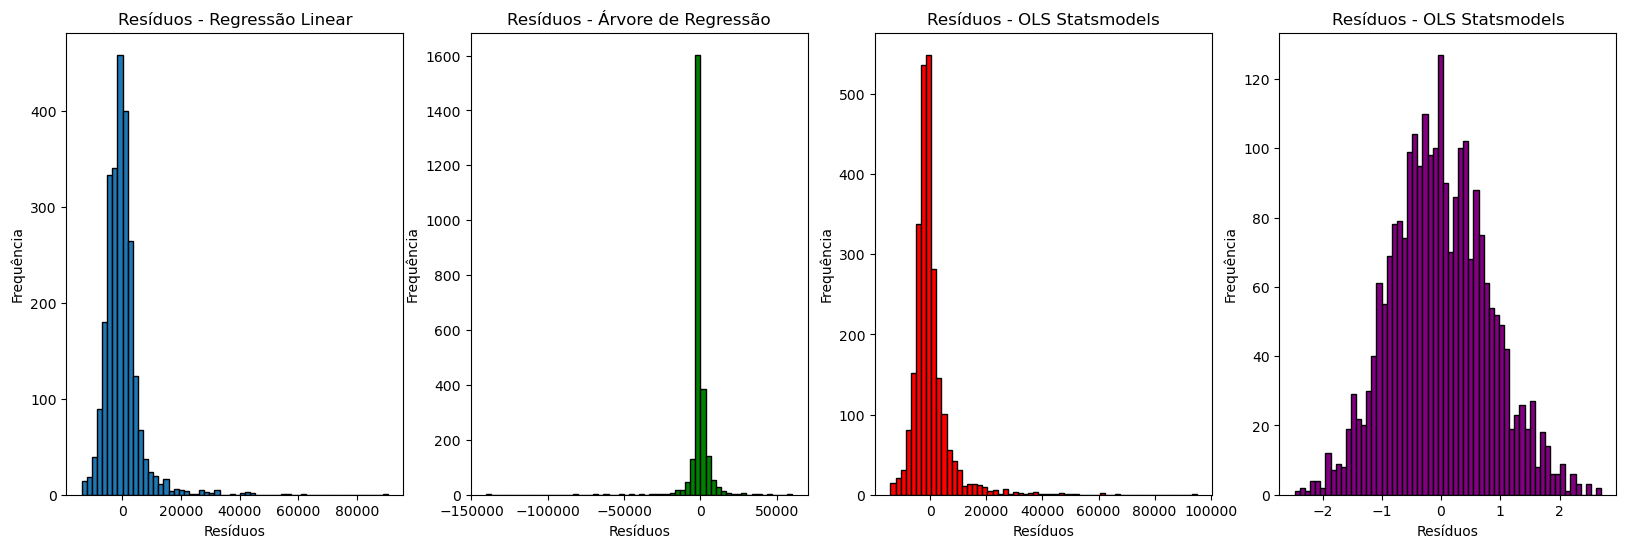

In [66]:
# Continuar com a análise dos resíduos
import matplotlib.pyplot as plt

# Resíduos - Regressão Linear
residuos_linear = y_test - y_pred_linear
plt.figure(figsize=(20, 6))

plt.subplot(141)
plt.hist(residuos_linear, bins=60, edgecolor='black')
plt.title('Resíduos - Regressão Linear')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')

# Resíduos - Árvore de Regressão
residuos_arvore = y_test - y_pred_arvore
plt.subplot(142)
plt.hist(residuos_arvore, bins=60, edgecolor='black', color='green')
plt.title('Resíduos - Árvore de Regressão')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')

# Resíduos - OLS Statsmodels
residuos_ols = y_test_renda - y_pred_ols
plt.subplot(143)
plt.hist(residuos_ols, bins=60, edgecolor='black', color='red')
plt.title('Resíduos - OLS Statsmodels')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')

# Resíduos - OLS Statsmodels - Renda_Log
residuos_renda_log = y_test_renda_log - y_pred_renda_log
plt.subplot(144)
plt.hist(residuos_renda_log, bins=60, edgecolor='black', color='purple')
plt.title('Resíduos - OLS Statsmodels')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')

Uma outra forma de visualizar os resíduos é através do Q-Q plot, que, no contexto de análise de resíduos em regressão, é usado para verificar se os resíduos seguem uma distribuição normal.

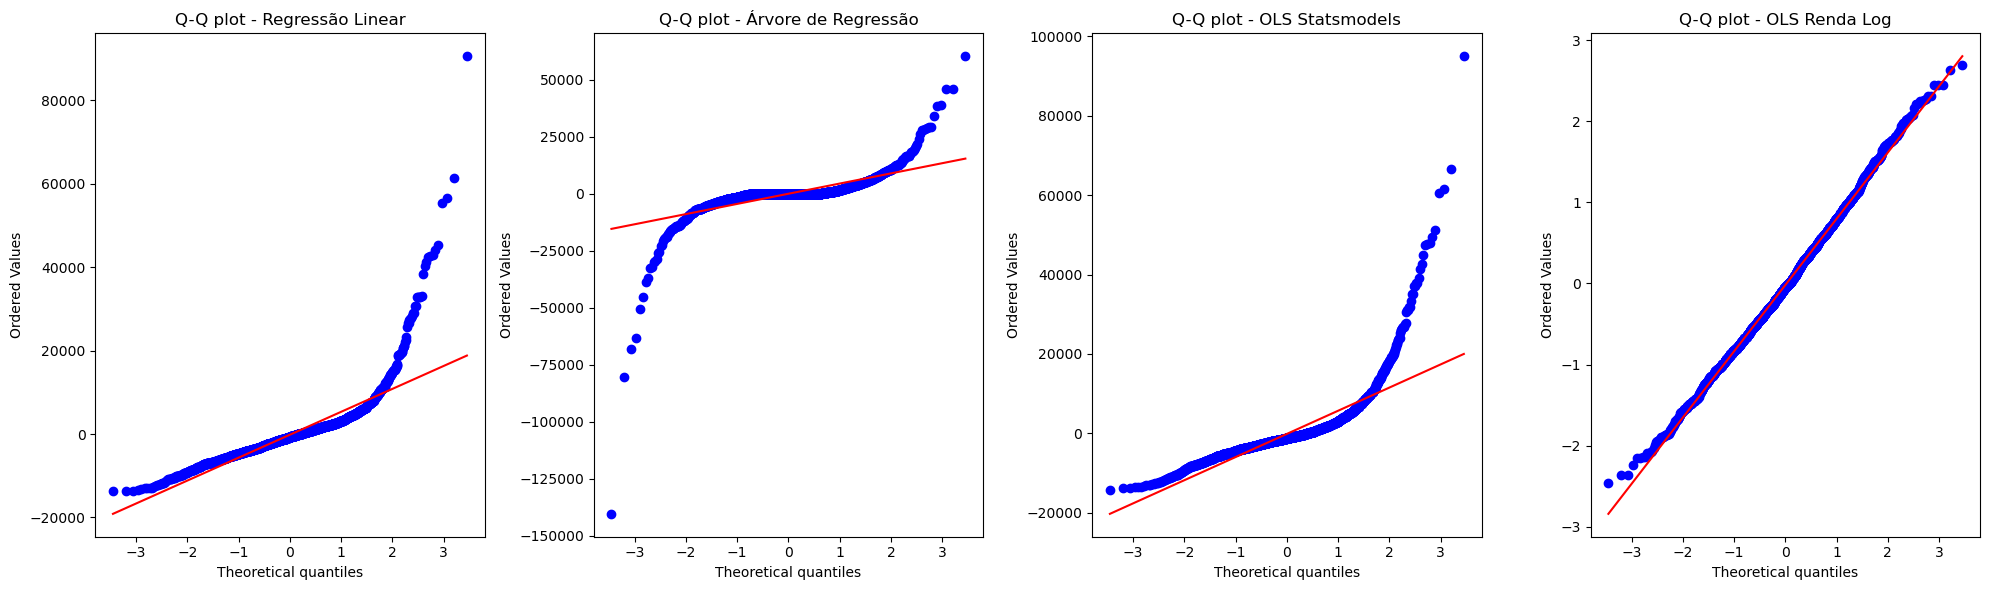

In [67]:
# Realizando a plotagem do gráfico Q-Q.
import scipy.stats as stats

plt.figure(figsize=(20, 6))

plt.subplot(141)
stats.probplot(residuos_linear, dist="norm", plot=plt)
plt.title("Q-Q plot - Regressão Linear")

plt.subplot(142)
stats.probplot(residuos_arvore, dist="norm", plot=plt)
plt.title("Q-Q plot - Árvore de Regressão")

plt.subplot(143)
stats.probplot(residuos_ols, dist="norm", plot=plt)
plt.title("Q-Q plot - OLS Statsmodels")

plt.subplot(144)
stats.probplot(residuos_renda_log, dist="norm", plot=plt)
plt.title("Q-Q plot - OLS Renda Log")

plt.tight_layout()
plt.show()

Nos gráficos dos resíduos acima, podemos perceber 3 comportamentos diferentes. Para os modelos de regressão linear e OLS, percebemos resíduos muito parecidos, com uma concentração maior entorno do 0, porém ainda apresentam uma distribuição um pouco mais assimétrica à direita, com uma cauda longa. No modelo de Árvore, vimos uma distribuição extremamente concentrada em torno do zero, o que poderia indicar problemas de overfitting. Já para o modelo onde foi aplicada a transformação é percebida uma distribuição muito mais próxima da normal comparada aos outros modelos.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

Agora, vamos testar o modelo através de inputs do usuário

In [68]:
tempo_emprego = float(input("Informe o tempo de emprego (em anos): "))
idade = int(input("Informe a idade: "))
posse_de_imovel = int(input("Possui imóvel próprio? (1 para Sim, 0 para Não): "))
tipo_renda_empresario = int(input("É empresário? (1 para Sim, 0 para Não): "))

# Criação do DataFrame de entrada com as mesmas colunas que o modelo espera
novos_dados = pd.DataFrame({
    'tempo_emprego': [tempo_emprego],
    'idade': [idade],
    'posse_de_imovel': [posse_de_imovel],
    'tipo_renda_empresario': [tipo_renda_empresario]
})

# Realizando a previsão com o modelo
y_pred_log = modelo_renda_log.predict(novos_dados)
y_pred = np.exp(y_pred_log)  # Convertendo de log para a escala original
print(f"Previsão de renda: R$ {round(y_pred[0], 2)}")

Previsão de renda: R$ 4142.43


Por fim, vamos salvar o nosso modelo renda_log no formato pickle, para poder carregá-lo em futuras aplicações.

In [69]:
import pickle

with open('modelo_renda_log.pkl', 'wb') as arquivo:
    pickle.dump(modelo_renda_log, arquivo)
